In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import time
import planarity
from networkx.algorithms import community
import make_mst

In [2]:
raw_data = pd.read_csv('cleaned_data.csv',index_col=0)

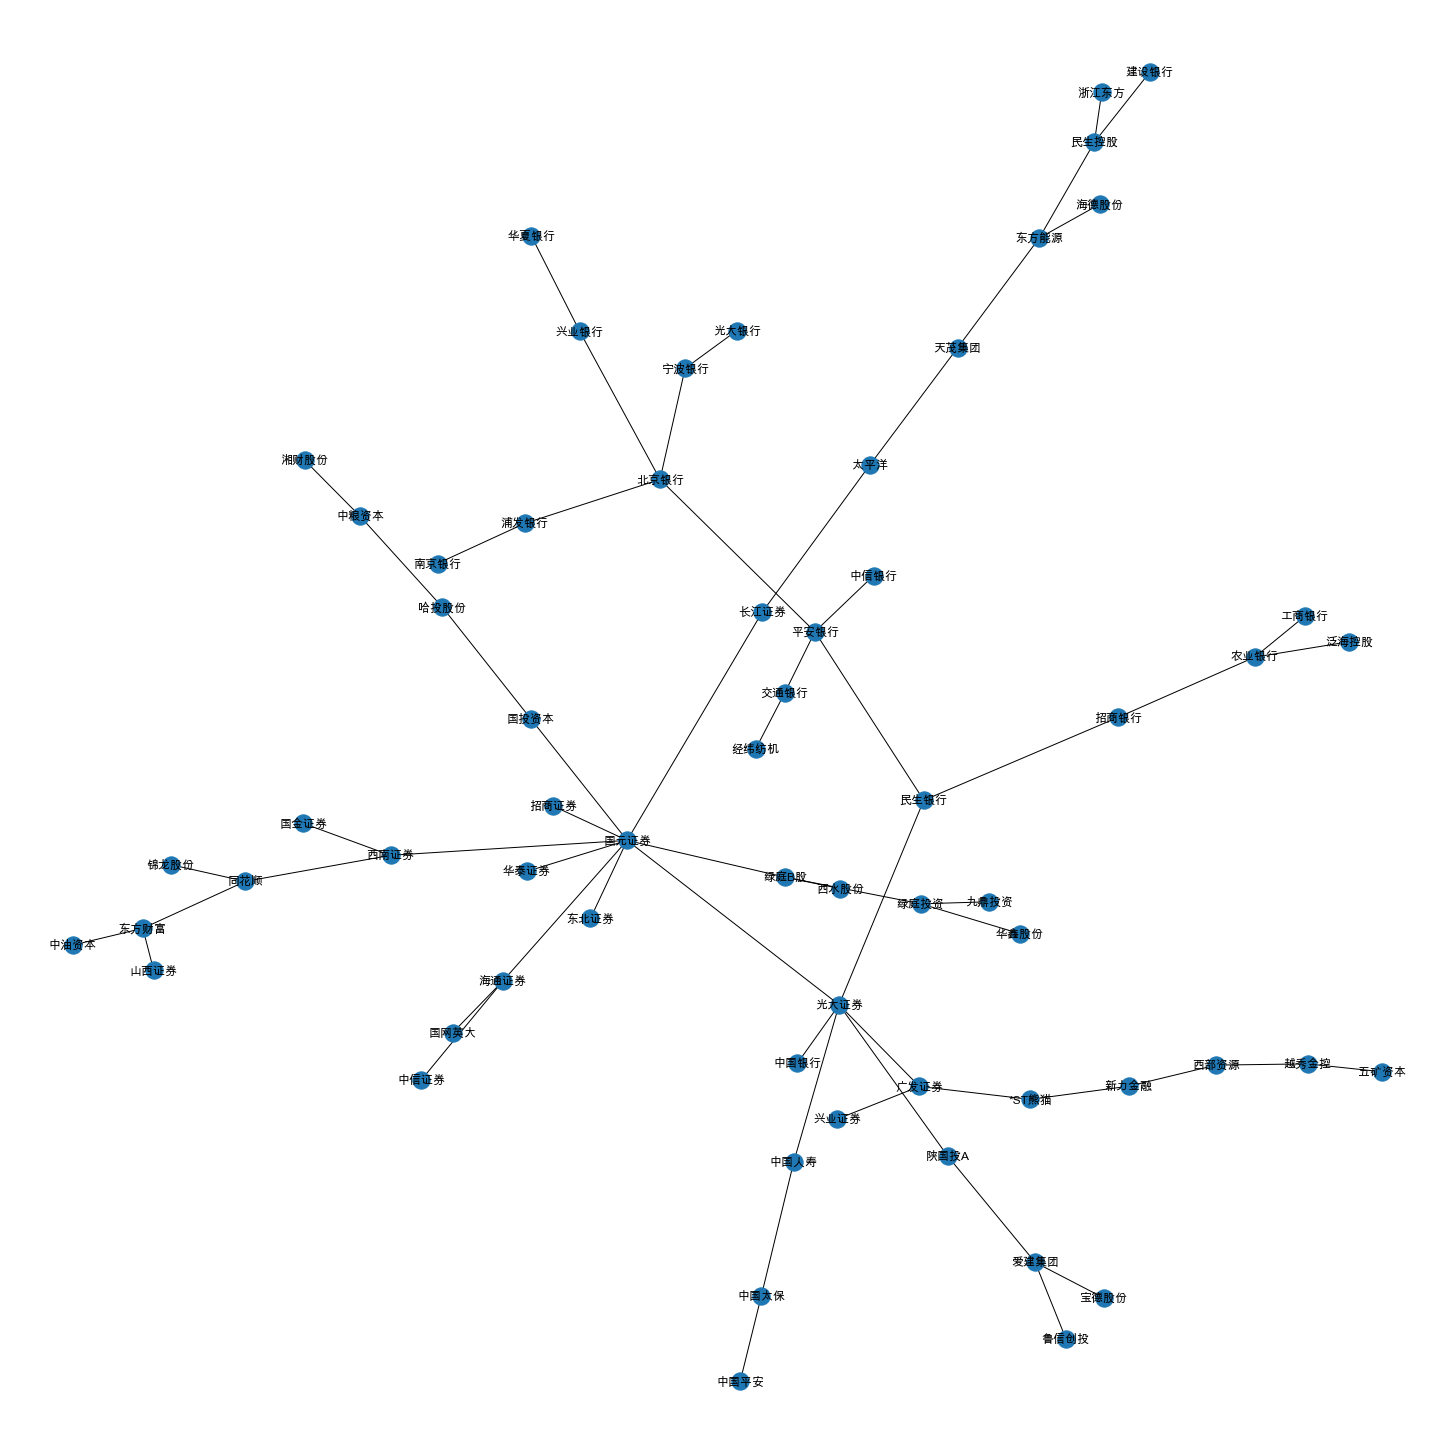

In [3]:
G = make_mst.get_graph('2010-11')
mst = make_mst.get_mst(G)

In [4]:
def get_colored_communities(mst):
    communities_generator = community.girvan_newman(mst)
    top_level_communities = next(communities_generator)
    next_level_communities = next(communities_generator)
    color_c = sorted(map(sorted, next_level_communities))
    print('number of communities: ',len(color_c))
    color = ['red','blue','yellow','green']
    color_map = []
    for node in mst:
        # print(node)
        if node in color_c[0]:
            color_map.append(color[0])
        elif node in color_c[1]:
            color_map.append(color[1])
        else:
            color_map.append(color[2])        
    plt.figure(figsize=(20,20))
    nx.draw_spring(mst,node_color = color_map,with_labels = True)

number of communities:  3


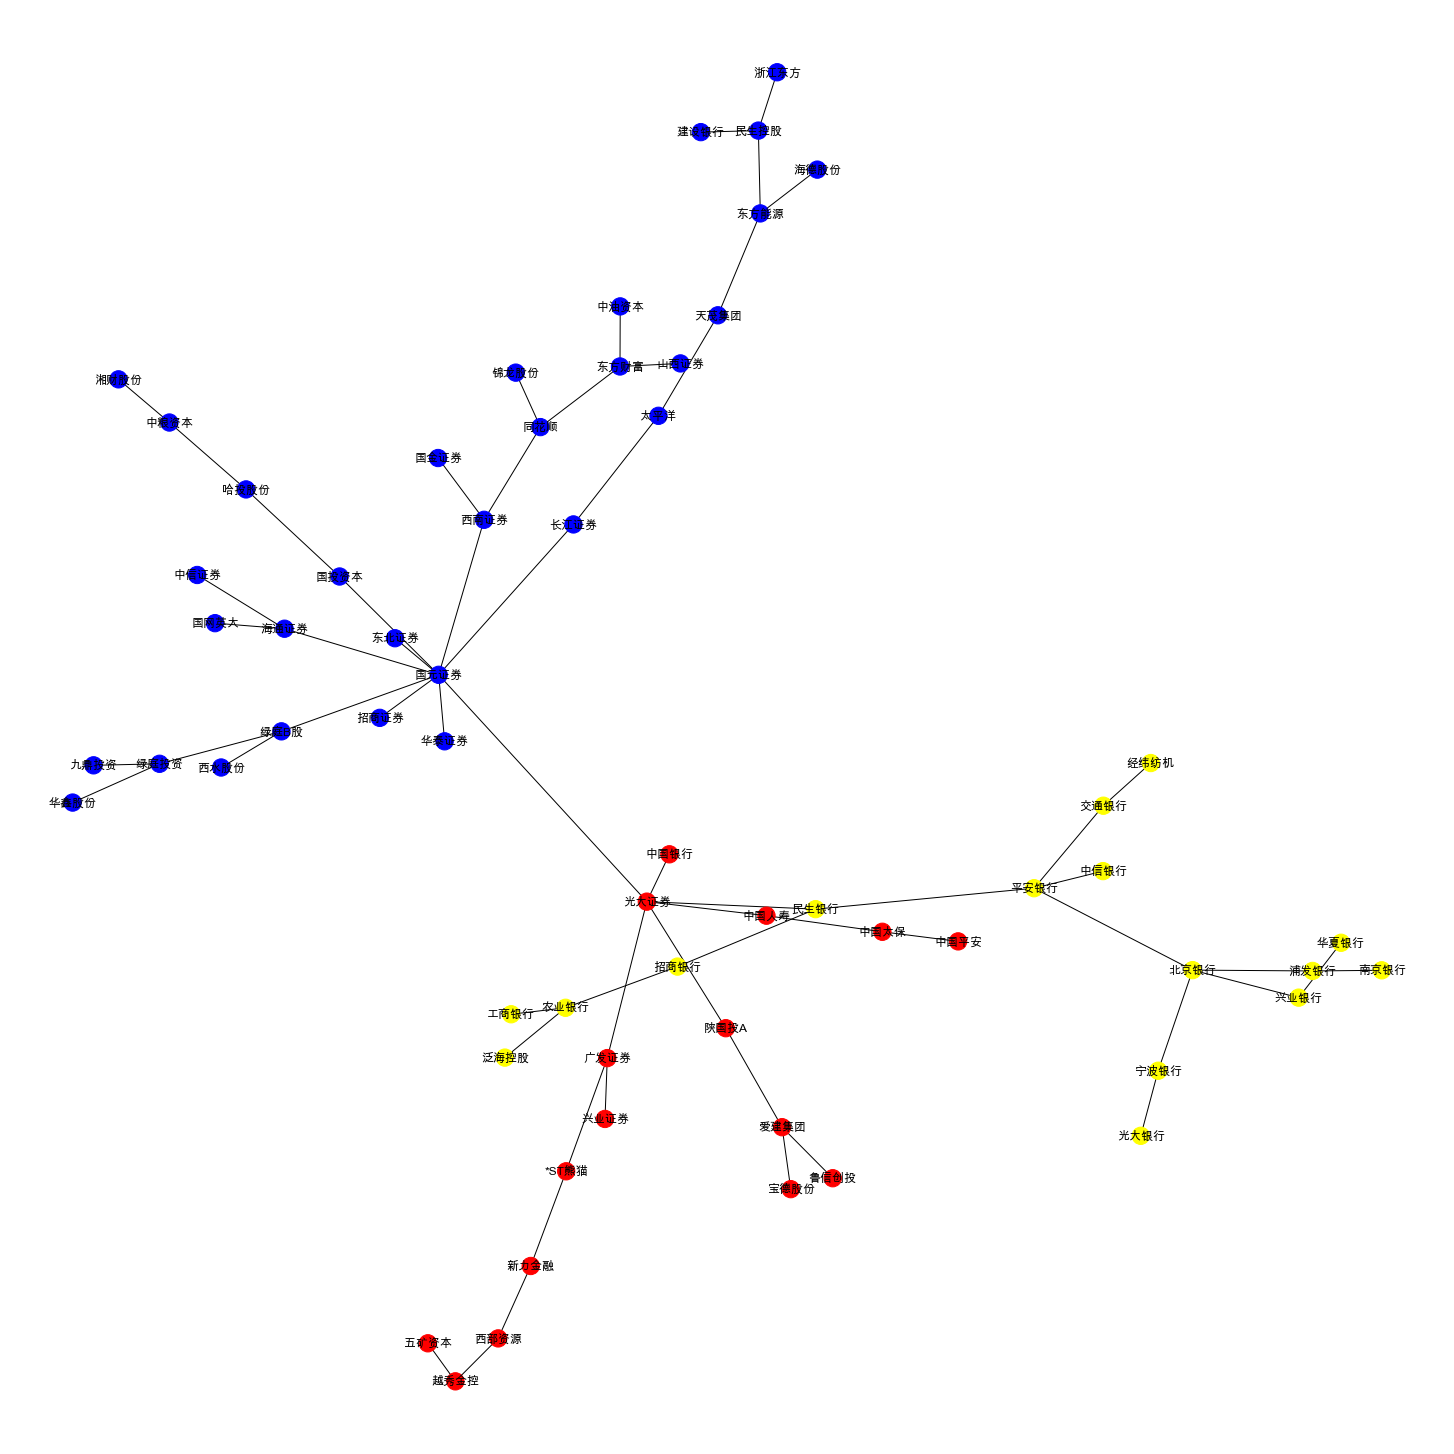

In [5]:
get_colored_communities(mst)